In [13]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [89]:
import numpy as np
import pandas as pd
import datetime as dt
from io import StringIO

# Reflect Tables into SQLAlchemy ORM

In [16]:
import pandas as pd
from pathlib import Path

In [92]:
# create engine to hawaii.sqlite
data_file = Path("Resources/hawaii_measurements.csv")
data_file1 = Path("Resources/hawaii_stations.csv")
data_file_df = pd.read_csv(data_file)
data_file_df1 = pd.read_csv(data_file1)


In [18]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
# reflect the tables
Base = automap_base()
Base.prepare(engine, reflect=True)

C:\Users\andy8\AppData\Local\Temp\ipykernel_29016\880747696.py:3: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)
C:\Users\andy8\AppData\Local\Temp\ipykernel_29016\880747696.py:6: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [19]:
# View all of the classes that automap found
print("Tables found by automap:")
print(Base.classes.keys())

Tables found by automap:
['station', 'measurement']


In [8]:
# Save references to each table
Measurement = Base.classes.measurement  
Station = Base.classes.station    

In [20]:
# Create our session (link) from Python to the DB
from sqlalchemy.orm import Session
session = Session(engine)

# Exploratory Precipitation Analysis

In [48]:
# Find the most recent date in the data set.
most_recent_date1 = data_file_df['date'].max()
most_recent_date1

'2017-08-23'

One year ago from most recent date: 2016-08-23


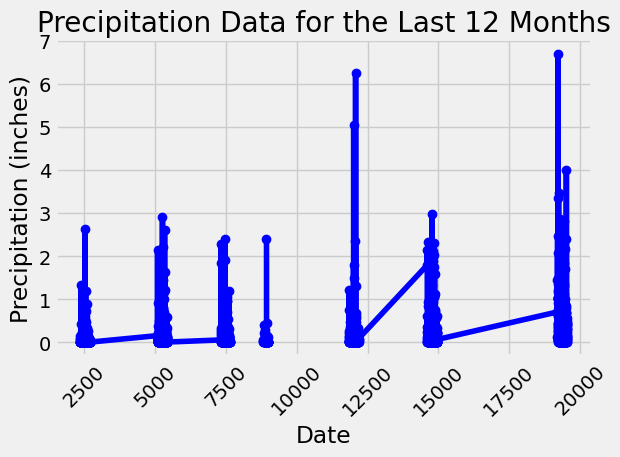

In [75]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date1 = pd.to_datetime(most_recent_date1)
one_year_ago = most_recent_date1 - pd.DateOffset(years=1)
one_year_ago


one_year_ago1 = one_year_ago.strftime('%Y-%m-%d')
last_12_months_df = data_file_df[data_file_df['date'] >= (one_year_ago1)]
# Extract the x and y values
x_values = last_12_months_df['date']
y_values = last_12_months_df['prcp']
print("One year ago from most recent date:", one_year_ago1)

# Perform a query to retrieve the data and precipitation scores
data1 = data_file_df['date']   
precipitation1 = data_file_df['prcp']
# Save the query results as a Pandas DataFrame. Explicitly set the column names

result_df = pd.DataFrame({
    'Date': data1,
    'Precipitation': precipitation1
})

# Use Pandas Plotting with Matplotlib to plot the data
plt.title('Precipitation Data for the Last 12 Months')
plt.plot(y_values , marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [77]:
# Use Pandas to calculate the summary statistics for the precipitation data
data_file_df['prcp'] = pd.to_numeric(data_file_df['prcp'], errors='coerce')

# Calculate summary statistics for 'prcp'
summary_stats = data_file_df['prcp'].describe()

# Display the results
print("Summary Statistics for Precipitation:")
print(summary_stats)

Summary Statistics for Precipitation:
count    18103.000000
mean         0.160644
std          0.468746
min          0.000000
25%          0.000000
50%          0.010000
75%          0.110000
max         11.530000
Name: prcp, dtype: float64


# Exploratory Station Analysis

In [79]:
# Design a query to calculate the total number of stations in the dataset

total_stations = data_file_df['station'].nunique()
print("Total number of stations in the dataset:", total_stations)


Total number of stations in the dataset: 9


In [80]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_counts = data_file_df.groupby('station').size().reset_index(name='counts')

# Sort the results in descending order
station_counts = station_counts.sort_values(by='counts', ascending=False)

# Display the results
print("Stations and their counts in descending order:")
print(station_counts)

Stations and their counts in descending order:
       station  counts
6  USC00519281    2772
7  USC00519397    2724
1  USC00513117    2709
8  USC00519523    2669
3  USC00516128    2612
2  USC00514830    2202
0  USC00511918    1979
4  USC00517948    1372
5  USC00518838     511


In [83]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = data_file_df['station'].mode()[0]
most_active_station1 = data_file_df[data_file_df['station'] == most_active_station]
lowest_temp = most_active_station1['tobs'].min()
highest_temp = most_active_station1['tobs'].max()
average_temp = most_active_station1['tobs'].mean()

In [84]:
most_active_station

'USC00519281'

<Figure size 1000x600 with 0 Axes>

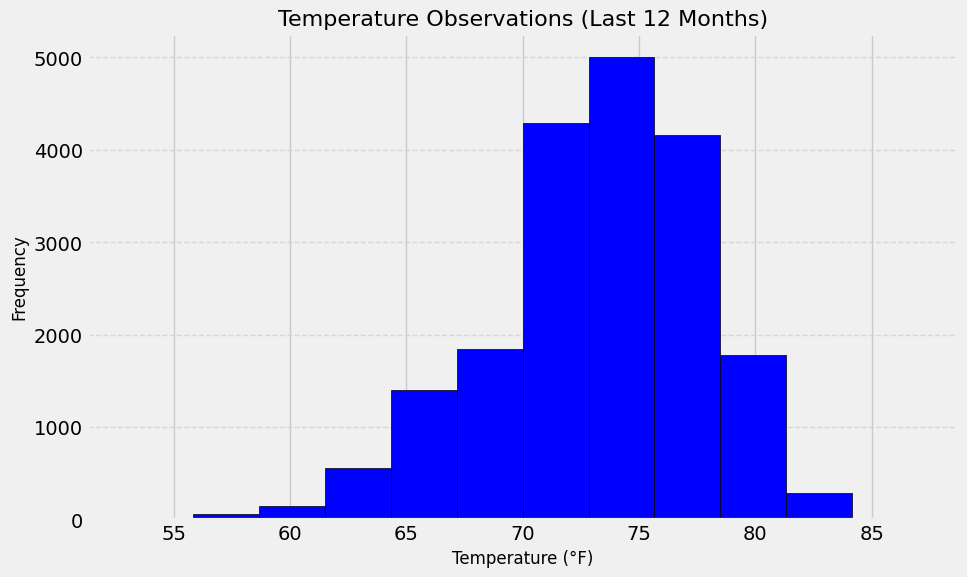

In [114]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
from datetime import timedelta
station_data = data_file_df[data_file_df['station'] == most_active_station]

# Calculate the last 12 months from the most recent date in the dataset
most_recent_date = pd.to_datetime(station_data['date'].max())
one_year_ago = most_recent_date - timedelta(days=365)

# Filter data for the last 12 months
last_12_months_data = pd.to_datetime(station_data['date']) > one_year_ago

# Plot a histogram of temperature observations
plt.figure(figsize=(10, 6))
plt.hist(data_file_df['tobs'], bins=12, color='blue', edgecolor='black')
plt.title('Temperature Observations (Last 12 Months)', fontsize=16)
plt.xlabel('Temperature (°F)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Close Session

In [104]:
# Close Session
session.close()